In [1]:
import gdown
"https://drive.google.com/file/d/1nWWwWcjNpYrFcmS0NVMxGUhcvE6myiFq/view?usp=sharing"
id_copied_on_google_drive = "1nWWwWcjNpYrFcmS0NVMxGUhcvE6myiFq"
url = f"https://drive.google.com/uc?id={id_copied_on_google_drive}"

out = "Construction_Site_Safety_Dataset.zip"
gdown.download(url, out, quiet=False)

!unzip Construction_Site_Safety_Dataset.zip

Downloading...
From (original): https://drive.google.com/uc?id=1nWWwWcjNpYrFcmS0NVMxGUhcvE6myiFq
From (redirected): https://drive.google.com/uc?id=1nWWwWcjNpYrFcmS0NVMxGUhcvE6myiFq&confirm=t&uuid=816cf3d1-cbb0-4974-b1c2-c914aa938012
To: /content/Construction_Site_Safety_Dataset.zip
100%|██████████| 156M/156M [00:03<00:00, 50.2MB/s]


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Construction_Site_Safety_Dataset/images/train/class2_187_jpg.rf.0d7353521d2c44ca566a10f336cf67d4.jpg  
  inflating: Construction_Site_Safety_Dataset/images/train/class2_187_jpg.rf.255a27589e0942a9a2a13f5062d00182.jpg  
  inflating: Construction_Site_Safety_Dataset/images/train/class2_187_jpg.rf.41c31a0f0e9d59715b6d91d66a6ee5ac.jpg  
  inflating: Construction_Site_Safety_Dataset/images/train/class2_187_jpg.rf.8d5940916dee2ba1633831c2b993ba0c.jpg  
  inflating: Construction_Site_Safety_Dataset/images/train/class2_187_jpg.rf.eda6e40cb0d1467695f0698504f48b2e.jpg  
  inflating: Construction_Site_Safety_Dataset/images/train/class5_012_jpg.rf.75ad7a3fa454c7d20bacf9e322ef64ac.jpg  
  inflating: Construction_Site_Safety_Dataset/images/train/class5_012_jpg.rf.8f62f85be581e150ad39081778d76bd2.jpg  
  inflating: Construction_Site_Safety_Dataset/images/train/class5_012_jpg.rf.91a8109030706b5ab458c84d5aadcf67.

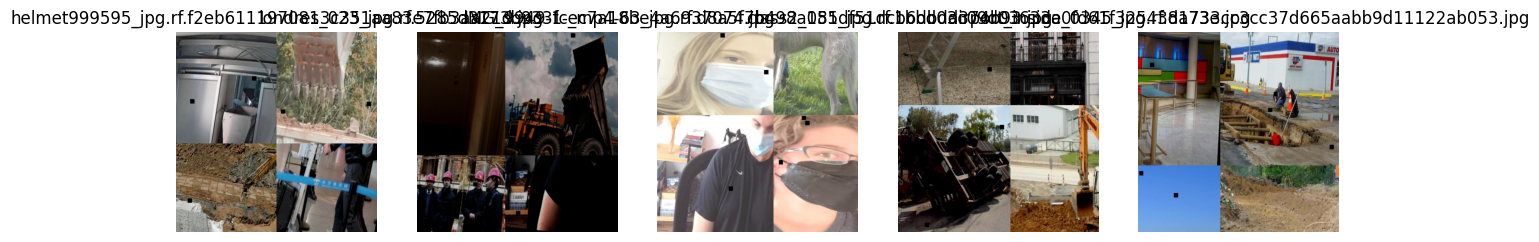

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import random

# Chemin vers le dossier des images
image_dir = "/content/Construction_Site_Safety_Dataset/images/train"
# Sélectionner 5 images aléatoires
sample_images = random.sample(os.listdir(image_dir), 5)

# Affichage des images
plt.figure(figsize=(15, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.show()


In [5]:
import os

# Chemins des dossiers
train_images = "/content/Construction_Site_Safety_Dataset/images/train"
train_labels = "/content/Construction_Site_Safety_Dataset/labels/train"

# Vérifier le nombre de fichiers
num_images = len(os.listdir(train_images))
num_labels = len(os.listdir(train_labels))

print(f"📂 Images dans train : {num_images}")
print(f"📂 Labels dans train : {num_labels}")

if num_images == 0 or num_labels == 0:
    print("❌ Erreur : Aucune donnée trouvée ! Vérifie la structure du dataset.")
else:
    print("✅ Les fichiers sont bien en place !")


📂 Images dans train : 2605
📂 Labels dans train : 2605
✅ Les fichiers sont bien en place !


In [3]:
# Chemin vers le dossier des annotations
label_dir = "/content/Construction_Site_Safety_Dataset/labels/train"

# Sélectionner une image et son annotation
sample_img = sample_images[0]
img_path = os.path.join(image_dir, sample_img)
label_path = os.path.join(label_dir, sample_img.replace(".jpg", ".txt"))

# Charger et afficher l'annotation
with open(label_path, "r") as f:
    annotations = f.readlines()

print(f"Annotations de {sample_img} :\n")
for ann in annotations:
    print(ann.strip())  # Afficher chaque ligne de l’annotation


Annotations de helmet999595_jpg.rf.f2eb6111970813c351aa83e7fb3aa21d.jpg :

8 0.75 0.3828125 0.5 0.353125
8 0.734375 0.1984375 0.45 0.396875
8 0.37890625 0.78046875 0.2421875 0.4390625
4 0.91171875 0.603125 0.1765625 0.0875
5 0.85859375 0.7796875 0.2828125 0.440625
5 0.8203125 0.7796875 0.359375 0.440625
5 0.69453125 0.7046875 0.2734375 0.290625


In [6]:
output_dir = "/content/Construction_Site_Safety_Dataset/images_resized/train"
os.makedirs(output_dir, exist_ok=True)

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)

    # Redimensionnement
    resized_img = cv2.resize(img, (640, 640))

    # Sauvegarde
    cv2.imwrite(os.path.join(output_dir, img_name), resized_img)

print("✅ Redimensionnement terminé !")


✅ Redimensionnement terminé !


In [7]:
# Installer Ultralytics YOLOv8
!pip install ultralytics opencv-python matplotlib

# Importer les librairies
import torch
from ultralytics import YOLO
import os

# Vérifier si un GPU est disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🔍 Utilisation de : {device}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 28.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
🔍 Utilisation de : cuda


In [9]:
yaml_content = """path: /content/Construction_Site_Safety_Dataset
train: images/train
val: images/valid
test: images/test

nc: 3
names: ['Helmet', 'Vest', 'No_PPE']
"""

with open("/content/Construction_Site_Safety_Dataset/data.yaml", "w") as file:
    file.write(yaml_content)

print("✅ Fichier data.yaml créé avec succès !")



✅ Fichier data.yaml créé avec succès !


In [11]:
import glob

label_dir = "/content/Construction_Site_Safety_Dataset/labels/train"

for label_file in glob.glob(os.path.join(label_dir, "*.txt")):
    with open(label_file, "r") as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            print(f"❌ Problème dans {label_file} : {line.strip()} (format incorrect)")


In [12]:
for label_file in glob.glob(os.path.join(label_dir, "*.txt")):
    with open(label_file, "r") as f:
        lines = f.readlines()

    valid_lines = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:  # Vérifier le bon format
            try:
                parts[1:] = [f"{float(x):.4f}" for x in parts[1:]]  # Arrondir les valeurs
                valid_lines.append(" ".join(parts) + "\n")
            except ValueError:
                print(f"⚠️ Problème dans {label_file}: {line.strip()} (valeur incorrecte)")

    # Sauvegarde des fichiers corrigés
    if valid_lines:
        with open(label_file, "w") as f:
            f.writelines(valid_lines)
    else:
        os.remove(label_file)  # Supprimer les annotations vides
        print(f"❌ Fichier supprimé : {label_file}")

print("✅ Vérification et correction des annotations terminée !")


❌ Fichier supprimé : /content/Construction_Site_Safety_Dataset/labels/train/youtube-197_jpg.rf.84e48afd1eb2f504aecfb6456a196950.txt
❌ Fichier supprimé : /content/Construction_Site_Safety_Dataset/labels/train/youtube-196_jpg.rf.d9d5913fb05f3dfcc17d19e54e9ecbf6.txt
❌ Fichier supprimé : /content/Construction_Site_Safety_Dataset/labels/train/construction-4-_mp4-19_jpg.rf.b39073990b499b99dfe415a49fdb90bb.txt
❌ Fichier supprimé : /content/Construction_Site_Safety_Dataset/labels/train/construction-1-_mp4-115_jpg.rf.7afe87b728c11bfa2d6616ef75081e4c.txt
❌ Fichier supprimé : /content/Construction_Site_Safety_Dataset/labels/train/construction-821-_jpg.rf.098b834846b3be5f1b24ef6dbc3a30a4.txt
❌ Fichier supprimé : /content/Construction_Site_Safety_Dataset/labels/train/construction-5-_mp4-30_jpg.rf.f671ac8915234f2ca8b9246d095055e9.txt
✅ Vérification et correction des annotations terminée !


In [14]:
# Installer YOLOv8 si ce n'est pas encore fait
!pip install ultralytics opencv-python matplotlib

# Importer les bibliothèques
import torch
from ultralytics import YOLO

# Vérifier si un GPU est disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🔍 Utilisation de : {device}")

# Charger le modèle YOLOv8 pré-entraîné
model = YOLO("yolov8n.pt")  # "n" pour nano, rapide et léger

# Entraîner le modèle
model.train(
    data="/content/Construction_Site_Safety_Dataset/data.yaml",
    epochs=50,  # Nombre d'époques
    batch=16,  # Taille du batch
    imgsz=640,  # Taille des images
    device=device,  # Utilisation du GPU
    patience=5,  # Arrêt si pas d'amélioration
    optimizer="Adam",  # Optimiseur stable
    lr0=0.001,  # Learning rate initial
    weight_decay=0.0005,  # Réduction du sur-apprentissage
    augment=True  # Augmentation des données activée
)


🔍 Utilisation de : cuda


100%|██████████| 6.25M/6.25M [00:00<00:00, 140MB/s]

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Construction_Site_Safety_Dataset/data.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.1MB/s]


AMP: checks passed ✅


train: Scanning /content/Construction_Site_Safety_Dataset/labels/train.cache... 2599 images, 6 backgrounds, 2599 corrupt: 100%|██████████| 2605/2605 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Construction_Site_Safety_Dataset/images/train/-1670-_png_jpg.rf.0463edb430019e01ec79eed27a6349d6.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/Construction_Site_Safety_Dataset/images/train/-1670-_png_jpg.rf.3cb172ea2c4165c19ae2dd498b38f929.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/Construction_Site_Safety_Dataset/images/train/-1670-_png_jpg.rf.7da967f9aeaa62defc36543b9e6000af.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/Construction_Site_Safety_Dataset/images/train/-1670-_png_jpg.rf.b42b26d784545ce1a033679674a4f3e5.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/Construction_Site_Safety_Dataset/imag


val: Scanning /content/Construction_Site_Safety_Dataset/labels/valid.cache... 114 images, 10 backgrounds, 104 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/Construction_Site_Safety_Dataset/images/valid/-1079-_png_jpg.rf.19092a3937930012f9fd9c1ce57f5a7b.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/Construction_Site_Safety_Dataset/images/valid/-1429-_png_jpg.rf.78a7894e86c79d018d80fa86f4d000f8.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/Construction_Site_Safety_Dataset/images/valid/-1969-_png_jpg.rf.41dd58ed3ae83df95fb2417c679d581f.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/Construction_Site_Safety_Dataset/images/valid/-1989-_png_jpg.rf.8cb3d6087bb86d08e693b4250fbf96e3.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/Construction_Site_Safety_Dataset/images/valid/-

Plotting labels to runs/detect/train2/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.973G          0       47.6          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.836G          0      47.57          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]


                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.834G          0      47.67          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.834G          0      47.56          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.23it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.834G          0      47.56          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]


                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.836G          0      47.59          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.852G          0      47.67          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.855G          0      38.34          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.24it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.855G          0      30.99          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.28it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.855G          0      25.11          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.855G          0      20.46          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.83it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.855G          0      16.75          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.855G          0      13.73          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.29it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.855G          0      11.29          0          0        640: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.73it/s]


RuntimeError: torch.cat(): expected a non-empty list of Tensors